## Exploratory Data Analysis - Arrival and Departure Distributions

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import scipy.stats as st

In [162]:
df_flights_cleaned = pd.read_csv('data/flights_cleaned.csv', index_col=False)
df_flights_cleaned[df_flights_cleaned.weather_delay > 0]

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
117,2019-02-28,DL,DL,2304,BOS,"Boston, MA",ATL,"Atlanta, GA",815,939.0,...,99.0,185,200.0,154.0,946,0.0,84.0,15.0,0.0,0.0
177,2018-10-17,AA,MQ,3674,DFW,"Dallas/Fort Worth, TX",TYR,"Tyler, TX",1215,1250.0,...,40.0,49,54.0,27.0,102,0.0,35.0,5.0,0.0,0.0
192,2018-07-24,NK,NK,324,MCO,"Orlando, FL",ACY,"Atlantic City, NJ",1850,2014.0,...,74.0,135,125.0,110.0,852,0.0,65.0,1.0,0.0,8.0
215,2019-02-19,DL,DL,1522,ATL,"Atlanta, GA",LIT,"Little Rock, AR",1738,1956.0,...,128.0,100,90.0,77.0,453,0.0,128.0,0.0,0.0,0.0
258,2019-08-21,WN,WN,712,BWI,"Baltimore, MD",PVD,"Providence, RI",750,900.0,...,73.0,75,78.0,56.0,327,0.0,70.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195813,2018-05-03,WN,WN,5642,DAL,"Dallas, TX",BWI,"Baltimore, MD",1315,1445.0,...,85.0,175,170.0,147.0,1209,0.0,26.0,0.0,0.0,59.0
195899,2018-02-21,AA,OH,5472,PHL,"Philadelphia, PA",HVN,"New Haven, CT",1050,1211.0,...,64.0,64,47.0,33.0,157,0.0,64.0,0.0,0.0,0.0
196084,2019-12-16,AA,MQ,3825,ORD,"Chicago, IL",TUL,"Tulsa, OK",1645,1653.0,...,21.0,124,137.0,108.0,585,0.0,8.0,13.0,0.0,0.0
196086,2019-04-18,WN,WN,17,DAL,"Dallas, TX",HOU,"Houston, TX",1100,1246.0,...,110.0,65,69.0,52.0,239,0.0,24.0,4.0,0.0,82.0


In [28]:
df_flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196193 entries, 0 to 196192
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              196193 non-null  object 
 1   mkt_unique_carrier   196193 non-null  object 
 2   op_unique_carrier    196193 non-null  object 
 3   op_carrier_fl_num    196193 non-null  int64  
 4   origin               196193 non-null  object 
 5   origin_city_name     196193 non-null  object 
 6   dest                 196193 non-null  object 
 7   dest_city_name       196193 non-null  object 
 8   crs_dep_time         196193 non-null  int64  
 9   dep_time             196193 non-null  float64
 10  dep_delay            196193 non-null  float64
 11  taxi_out             196193 non-null  float64
 12  taxi_in              196193 non-null  float64
 13  crs_arr_time         196193 non-null  int64  
 14  arr_time             196193 non-null  float64
 15  arr_delay        

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

# Arrival Delay
Plots to show distribution of arrival delay and analyze/remove outliers

### Arrival Delay with outliers

In [29]:
df_flights_cleaned["arr_delay"].describe()

count    196193.000000
mean          5.626179
std          51.197635
min         -78.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1515.000000
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='arr_delay'>

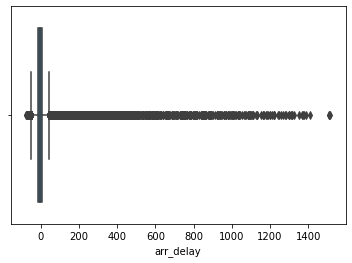

In [30]:
sns.boxplot(x=df_flights_cleaned["arr_delay"])

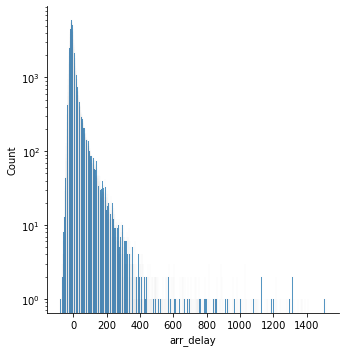

In [32]:
ax = sns.displot(df_flights_cleaned, x="arr_delay")
ax.set(yscale='log')

Will need to remove outliers because there is a high standard deviation within the data set (data points are further from the mean).

### Arrival Delay without outliers (using IQR method)

<AxesSubplot:xlabel='arr_delay'>

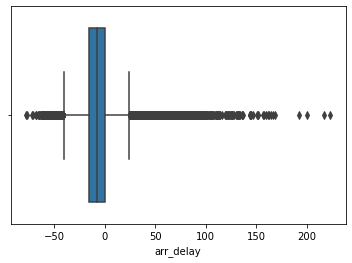

In [48]:
cols = ['arr_delay']

Q1 = df_flights_cleaned[cols].quantile(0.25)
Q3 = df_flights_cleaned[cols].quantile(0.75)
IQR = Q3 - Q1

df_arr_rmoutlier = df_flights_cleaned[~((df_flights_cleaned[cols] < (Q1 - 1.5 * IQR)) | (df_flights_cleaned[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(x=df_rm_outlier["arr_delay"])

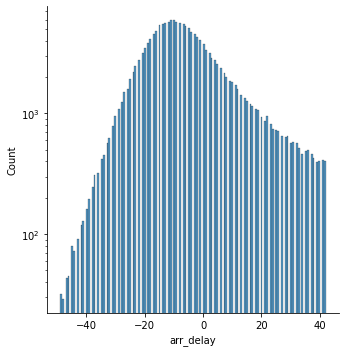

In [49]:
ax = sns.displot(df_arr_rmoutlier, x="arr_delay")
ax.set(yscale='log')

In [50]:
df_arr_rmoutlier.shape

(177910, 25)

In [51]:
df_arr_rmoutlier["arr_delay"].describe()

count    177910.000000
mean         -5.411540
std          15.314401
min         -49.000000
25%         -16.000000
50%          -8.000000
75%           2.000000
max          42.000000
Name: arr_delay, dtype: float64

* 18,283 outliers were removed from arr_delay (arrival delay) using IQR method 
* standard deviation is lower with the outliers removed

In [164]:
df_arr_rmoutlier.to_csv('flights_arr_delay_for_weather.csv', index=False)

# Departure Delay
Plots to show distribution of departure delay and analyze/remove outliers

### Departure Delay with Outliers

In [41]:
df_flights_cleaned["dep_delay"].describe()

count    196193.000000
mean         10.589511
std          48.962303
min         -41.000000
25%          -6.000000
50%          -2.000000
75%           6.000000
max        1522.000000
Name: dep_delay, dtype: float64

<AxesSubplot:xlabel='dep_delay'>

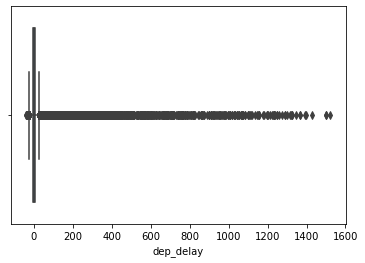

In [42]:
sns.boxplot(x=df_flights_cleaned["dep_delay"])

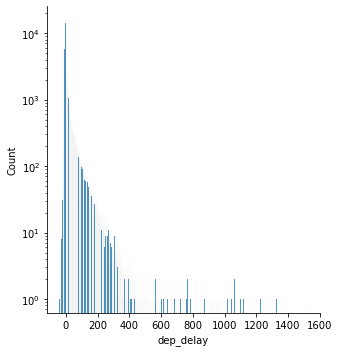

In [44]:
ax = sns.displot(df_flights_cleaned, x="dep_delay")
ax.set(yscale='log')

### Departures Delay without outliers (using IQR method)

<AxesSubplot:xlabel='arr_delay'>

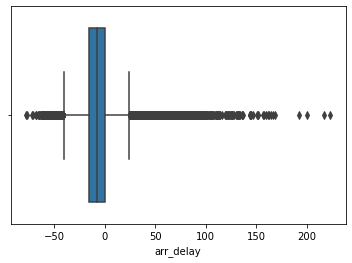

In [47]:
cols = ['dep_delay']

Q1 = df_flights_cleaned[cols].quantile(0.25)
Q3 = df_flights_cleaned[cols].quantile(0.75)
IQR = Q3 - Q1

df_dep_rmoutlier = df_flights_cleaned[~((df_flights_cleaned[cols] < (Q1 - 1.5 * IQR)) | (df_flights_cleaned[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(x=df_dep_rmoutlier["arr_delay"])

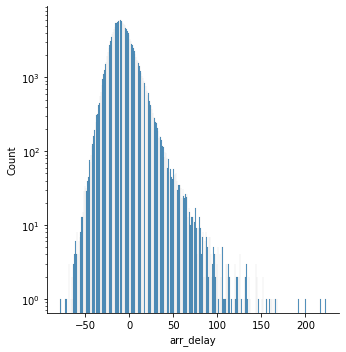

In [52]:
ax = sns.displot(df_dep_rmoutlier, x="arr_delay")
ax.set(yscale='log')

In [55]:
df_dep_rmoutlier['dep_delay'].shape

(168925,)

In [56]:
df_dep_rmoutlier['dep_delay'].describe()

count    168925.000000
mean         -1.686174
std           7.444625
min         -24.000000
25%          -6.000000
50%          -3.000000
75%           0.000000
max          24.000000
Name: dep_delay, dtype: float64

* 27,268 outliers were removed from dep_delay (departure delay) using IQR method
* standard deviation is lower with the outliers removed

#### Test the hypothesis that the delay is from Normal distribution

In [ ]:
## Vicki

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
## Vicki 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [145]:
df_flights_cleaned['crs_dep_time']

0         1100
1         1311
2         2130
3         1834
4         1359
          ... 
196188    1735
196189    1535
196190     845
196191     810
196192    1950
Name: crs_dep_time, Length: 196193, dtype: int64

In [146]:
df['crs_dep_time'].astype(str).str.zfill(4)

0         1100
1         1311
2         2130
3         1834
4         1359
          ... 
196188    1735
196189    1535
196190    0845
196191    0810
196192    1950
Name: crs_dep_time, Length: 196193, dtype: object

In [147]:
df_dep_rmoutlier.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303.0,...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833.0,...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353.0,...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0
5,2018-10-30,DL,OO,3807,SLC,"Salt Lake City, UT",SMF,"Sacramento, CA",1535,1533.0,...,-7.0,112,107.0,81.0,532,0.0,0.0,0.0,0.0,0.0
6,2018-03-31,DL,DL,2530,CLE,"Cleveland, OH",ATL,"Atlanta, GA",715,713.0,...,3.0,110,115.0,83.0,554,0.0,0.0,0.0,0.0,0.0


In [149]:
df_dep_rmoutlier.columns

Index(['fl_date', 'mkt_unique_carrier', 'op_unique_carrier',
       'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [163]:
# df_weather = df_dep_rmoutlier[["fl_date", "origin", "dest", "crs_dep_time", "weather_delay"]]

# df_weather["flight_date"] = pd.to_datetime(df_weather.fl_date)
# df_weather['crs_dep_time'] = df_weather['crs_dep_time'].astype(str).str.zfill(4)

# df_weather["flight_date"] +=  pd.to_timedelta(df_weather.crs_dep_time.astype(str).str[:2].astype(int), unit='h')
# df_weather["flight_date"] +=  pd.to_timedelta(df_weather.crs_dep_time.astype(str).str[-2:].astype(int), unit='m')

# # display(df["flight_date"])

# print(df_weather["flight_date"].dt.strftime("%Y-%m-%dT%H:%M:%S"))

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
#airtime and dept delay and total estimated time?

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
# categorize by distance, by dept time, which time of the day

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?